In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
marker_dir = "/home/ics-student/students/jinho/FP/pupil_ros/bags/jinho/markers"

r1_list = pd.read_csv("/home/ics-student/students/jinho/FP/pupil_ros/bags/jinho/markers/R1.csv")
l1_list = pd.read_csv("/home/ics-student/students/jinho/FP/pupil_ros/bags/jinho/markers/L1.csv")

In [34]:
l1_list

,Unnamed: 0,Timestamp,Marker
0,0,4299.503354,Experiment Start
1,1,4300.624842,Target Start
2,2,4300.834858,Target End
3,3,4300.868461,Goal Start
4,4,4301.553114,Goal End
...,...,...,...
229,229,4377.427822,Target Start
230,230,4377.776450,Target End
231,231,4377.940262,Goal Start
232,232,4378.721523,Goal End


In [29]:
r1_timestamps = r1_list["Timestamp"].to_numpy()
r1_markers = r1_list["Marker"].tolist()

l1_timestamps = l1_list["Timestamp"].to_numpy()
l1_markers = l1_list["Marker"].tolist()

In [45]:
# if no output, all is good
# Input: a python list with marker strings. Exclude experiment start and experiment end from list
def check_list(marker_list):
    for i in range(len(marker_list)-1):
        if marker_list[i] == "Target Start" and marker_list[i+1] != "Target End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target End" and marker_list[i+1] != "Goal Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal Start" and marker_list[i+1] != "Goal End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal End" and marker_list[i+1] != "Target Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Target Start but is ", marker_list[i+1])
            break

check_list(l1_markers[1:-1])
check_list(r1_markers[1:-1])

In [46]:
r1_experiment_duration = r1_timestamps[-1] - r1_timestamps[0]
l1_experiment_duration = l1_timestamps[-1] - l1_timestamps[0]

print("Right:      ", r1_experiment_duration, "s")
print("Left:       ", l1_experiment_duration, "s")
print("Difference: ", l1_experiment_duration - r1_experiment_duration, "s")

Right:       66.73977799900013 s
Left:        79.26026849900063 s
Difference:  12.520490500000506 s


In [77]:
def calculate_duration(timestamp_list, marker_list):
    if len(marker_list) % 4:
        print(len(marker_list))
        print("List not correct size! Please check input list")
        return None
    else:
        durations = np.zeros((int(len(marker_list)/4), 2))
        for i in range(durations.shape[0]):
            start_index = i*4
            if marker_list[start_index] == "Target Start" and marker_list[start_index+1] == "Target End" and marker_list[start_index+2] == "Goal Start" and marker_list[start_index+3] == "Goal End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
            else:
                print("Order of markers is not right!")
                break
        return durations
    
r1_durations = calculate_duration(r1_timestamps[1:-1], r1_markers[1:-1])
l1_durations = calculate_duration(l1_timestamps[1:-1], l1_markers[1:-1])

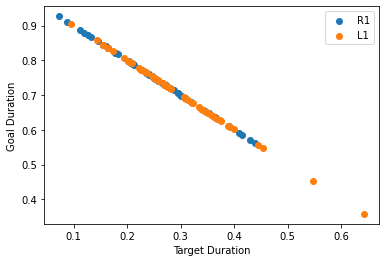

In [85]:
fig, ax = plt.subplots()

# ax.scatter(r1_durations[:,1], r1_durations[:,0], label='R1')
# ax.scatter(l1_durations[:,1], l1_durations[:,0], label='L1')
ax.scatter(r1_durations[:,0]/(r1_durations[:,0] + r1_durations[:,1]), r1_durations[:,1]/(r1_durations[:,0] + r1_durations[:,1]), label='R1')
ax.scatter(l1_durations[:,0]/(l1_durations[:,0] + l1_durations[:,1]), l1_durations[:,1]/(l1_durations[:,0] + l1_durations[:,1]), label='L1')
ax.set_xlabel("Target Duration")
ax.set_ylabel("Goal Duration")
ax.legend()

# ax.scatter(r1_durations[:,1]/r1_experiment_duration, r1_durations[:,0]/r1_experiment_duration)
# ax.scatter(l1_durations[:,1]/l1_experiment_duration, l1_durations[:,0]/l1_experiment_duration)

In [90]:
fig.savefig("trial_plot2.pdf")

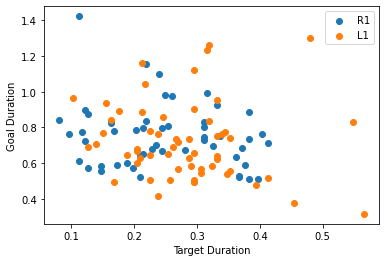

In [91]:
fig2, ax2 = plt.subplots()

# ax.scatter(r1_durations[:,1], r1_durations[:,0], label='R1')
# ax.scatter(l1_durations[:,1], l1_durations[:,0], label='L1')
r1_duration_mean = np.mean(r1_durations[:,0] + r1_durations[:,1])
l1_duration_mean = np.mean(l1_durations[:,0] + l1_durations[:,1])
ax2.scatter(r1_durations[:,0]/r1_duration_mean, r1_durations[:,1]/r1_duration_mean, label='R1')
ax2.scatter(l1_durations[:,0]/l1_duration_mean, l1_durations[:,1]/l1_duration_mean, label='L1')
ax2.set_xlabel("Target Duration")
ax2.set_ylabel("Goal Duration")
ax2.legend()

Text(0.5, 1.0, 'R1')

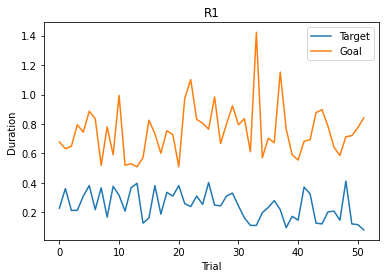

In [101]:
fig3, ax3 = plt.subplots()

ax3.plot(range(r1_durations[:,0].shape[0]),r1_durations[:,0]/r1_duration_mean, label = "Target")
ax3.plot(range(r1_durations[:,1].shape[0]),r1_durations[:,1]/r1_duration_mean, label = "Goal")
ax3.legend()
ax3.set_xlabel("Trial")
ax3.set_ylabel("Duration")
ax3.set_title("R1")

Text(0.5, 1.0, 'L1')

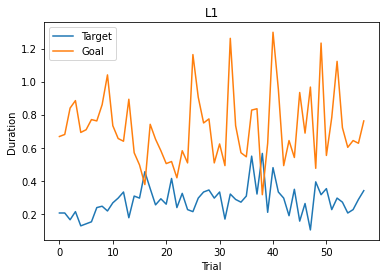

In [102]:
fig4, ax4 = plt.subplots()

ax4.plot(range(l1_durations[:,0].shape[0]),l1_durations[:,0]/l1_duration_mean, label = "Target")
ax4.plot(range(l1_durations[:,1].shape[0]),l1_durations[:,1]/l1_duration_mean, label = "Goal")
ax4.legend()
ax4.set_xlabel("Trial")
ax4.set_ylabel("Duration")
ax4.set_title("L1")

In [103]:
r1_ratios = r1_durations[:,0]/r1_durations[:,1]
l1_ratios = l1_durations[:,0]/l1_durations[:,1]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d3c860e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d3c86f340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d3c860bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8d3c86f8b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d3c86fb80>,
 'means': []}

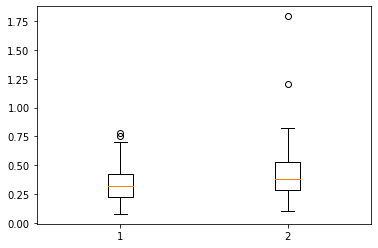

In [105]:
fig5, ax5 = plt.subplots()

ax5.boxplot([r1_ratios, l1_ratios])